In [1]:
import datetime
today = datetime.date.today()
date = str(today)
#date = "2020-03-26"

#url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-%s.xlsx" % date
url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx"

import pandas as pd
data = pd.read_excel(url)

In [2]:
countries = ['DE', 'ES', 'FR', 'IT', 'SE', 'UK', 'US', 'KR', 'JP', 'CN', 'IN']

import math
def rawData(df, title):
    cases = pd.DataFrame(columns = ['Date'])

    for country in countries:
        countryData = df[df['geoId'] == country][['dateRep', title]]
        countryData.columns = ['Date', country]
        cases = pd.merge(cases, countryData, on='Date', how='right')
        cases = cases.fillna(0)

    return cases.sort_values(by=['Date'])

def sumData(df):
    a = df[countries].to_numpy()

    for i in range(1, df.shape[0]):
        a[i] = a[i] + a[i - 1]

    return pd.DataFrame(data=a, index=cases['Date'], columns=countries)

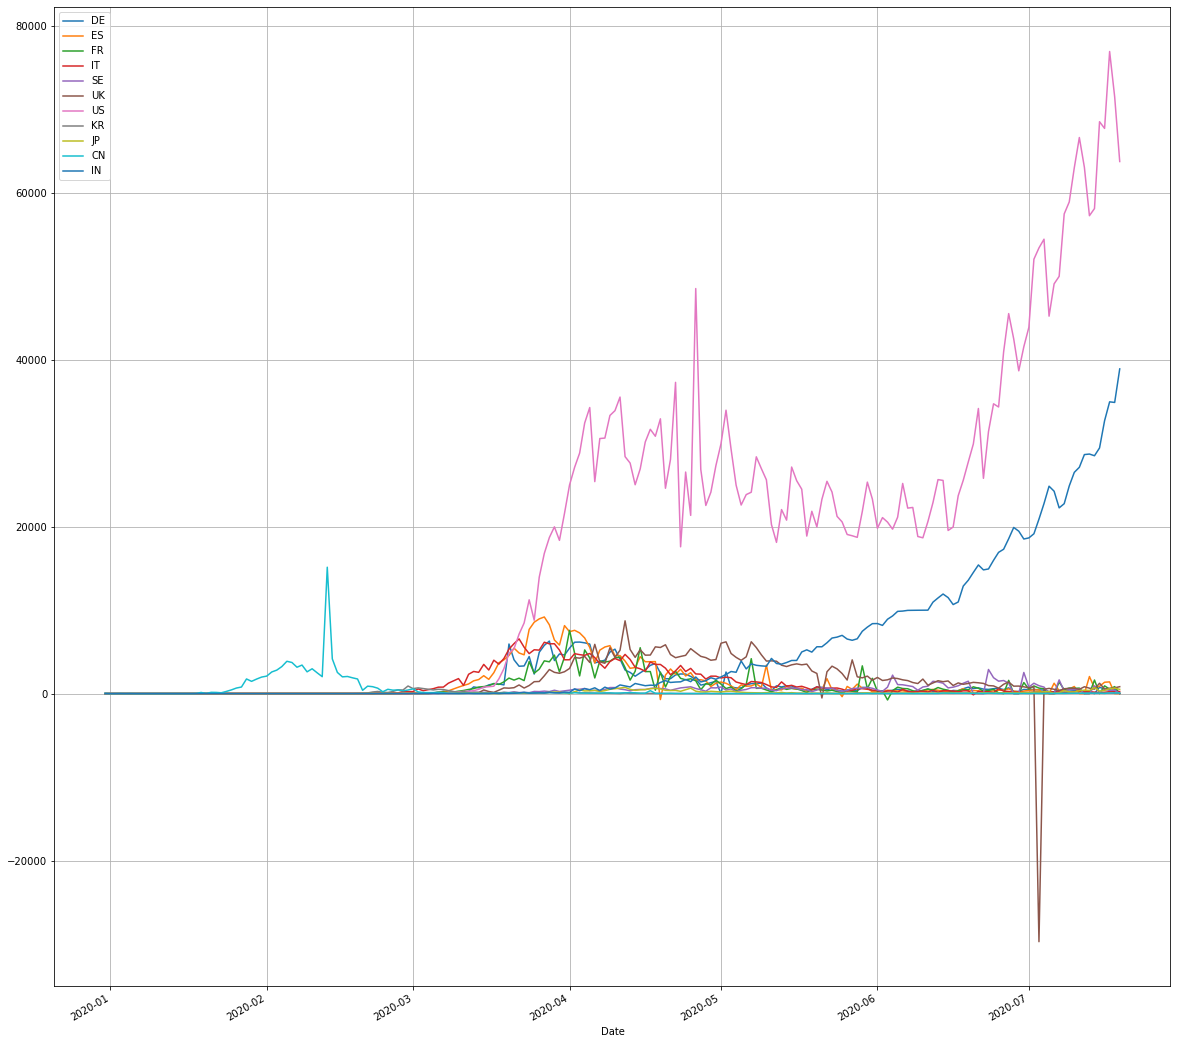

In [3]:
cases = rawData(data, 'cases')
cases.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

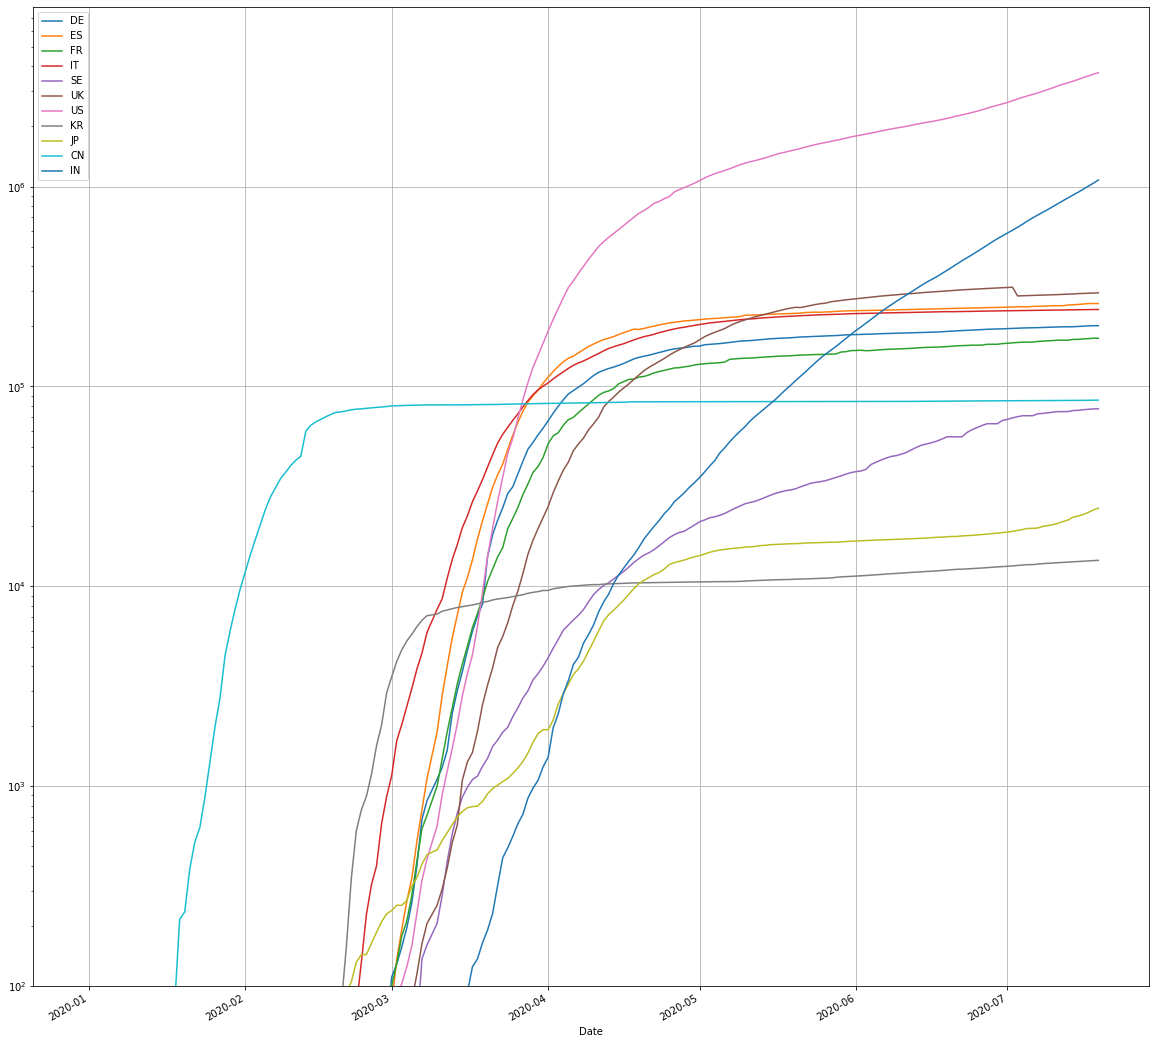

In [4]:
sumCases = sumData(cases)
sumCases.plot.line(logy=True, figsize=(20, 20), ylim=(100, None), grid=True)

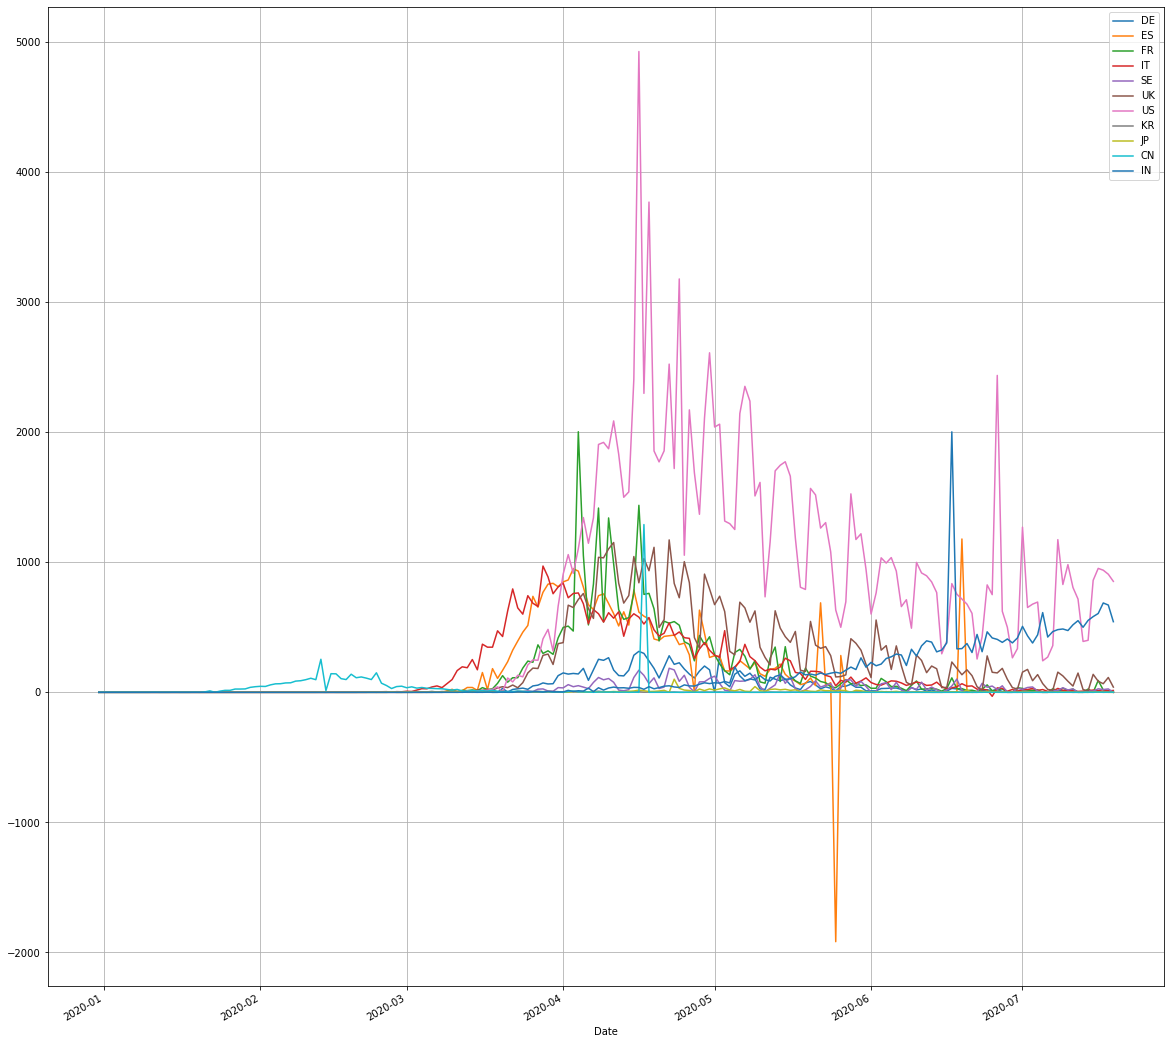

In [5]:
deaths = rawData(data, 'deaths')
deaths.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

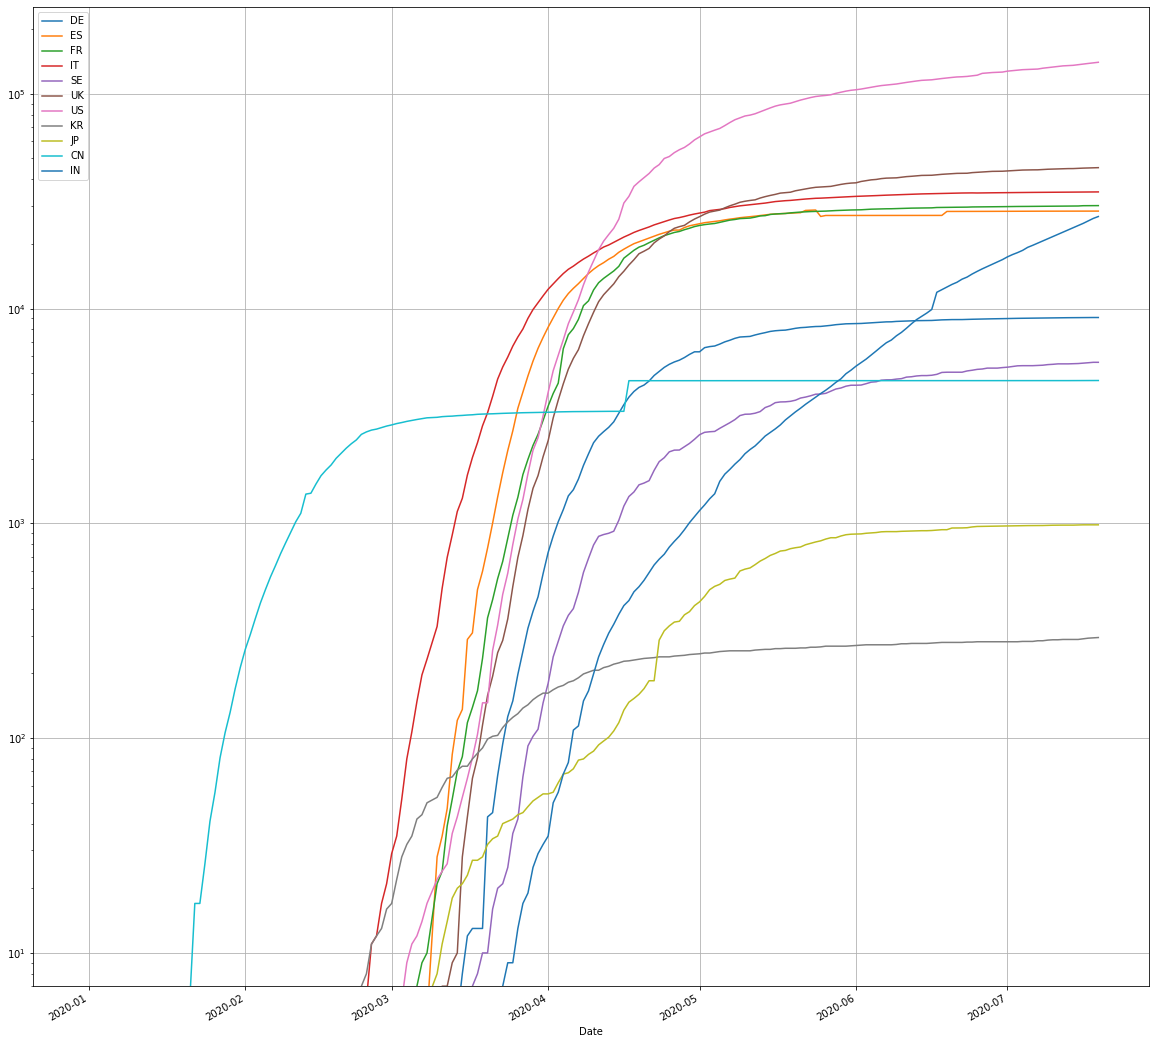

In [6]:
sumDeaths = sumData(deaths)
sumDeaths.plot.line(logy=True, figsize=(20, 20), ylim=(7, None), grid=True)

In [7]:
cases.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-07-05,239.0,0.0,0,235,0,624,45221,61,240,18,24850
12,2020-07-06,219.0,1244.0,0,192,0,516,49093,0,0,14,24248
11,2020-07-07,390.0,341.0,1375,208,1642,352,49990,90,106,25,22252
10,2020-07-08,397.0,383.0,475,137,283,581,57473,63,353,21,22752
9,2020-07-09,442.0,543.0,663,193,514,630,58906,49,193,33,24879
8,2020-07-10,395.0,852.0,621,214,475,642,63004,45,197,46,26506
7,2020-07-11,378.0,0.0,658,276,565,512,66625,35,348,40,27114
6,2020-07-12,248.0,0.0,0,188,0,820,63051,44,410,35,28637
5,2020-07-13,159.0,2045.0,0,234,0,650,57258,62,373,46,28701
4,2020-07-14,0.0,666.0,1625,169,928,530,58114,33,718,55,28498


In [8]:
sumCases.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-07-05,196280.0,250112.0,166550.0,239927.0,71377.0,284833.0,2839421.0,12843.0,19489.0,84812.0,673165.0
2020-07-06,196499.0,251356.0,166550.0,240119.0,71377.0,285349.0,2888514.0,12843.0,19489.0,84826.0,697413.0
2020-07-07,196889.0,251697.0,167925.0,240327.0,73019.0,285701.0,2938504.0,12933.0,19595.0,84851.0,719665.0
2020-07-08,197286.0,252080.0,168400.0,240464.0,73302.0,286282.0,2995977.0,12996.0,19948.0,84872.0,742417.0
2020-07-09,197728.0,252623.0,169063.0,240657.0,73816.0,286912.0,3054883.0,13045.0,20141.0,84905.0,767296.0
2020-07-10,198123.0,253475.0,169684.0,240871.0,74291.0,287554.0,3117887.0,13090.0,20338.0,84951.0,793802.0
2020-07-11,198501.0,253475.0,170342.0,241147.0,74856.0,288066.0,3184512.0,13125.0,20686.0,84991.0,820916.0
2020-07-12,198749.0,253475.0,170342.0,241335.0,74856.0,288886.0,3247563.0,13169.0,21096.0,85026.0,849553.0
2020-07-13,198908.0,255520.0,170342.0,241569.0,74856.0,289536.0,3304821.0,13231.0,21469.0,85072.0,878254.0


In [9]:
deaths.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-07-05,2.0,0.0,0,21,0,67,242,0,0,0,613
12,2020-07-06,4.0,3.0,0,7,0,22,271,0,0,0,425
11,2020-07-07,8.0,4.0,27,8,13,16,359,2,0,0,467
10,2020-07-08,12.0,4.0,13,30,14,155,1174,0,1,0,482
9,2020-07-09,12.0,5.0,32,15,35,126,829,2,2,0,487
8,2020-07-10,6.0,2.0,14,12,18,85,982,1,1,0,475
7,2020-07-11,6.0,0.0,25,12,26,48,806,0,1,0,519
6,2020-07-12,3.0,0.0,0,7,0,148,717,1,0,0,551
5,2020-07-13,1.0,3.0,0,9,0,21,391,0,0,0,500
4,2020-07-14,0.0,3.0,25,13,10,11,400,0,0,1,553


In [10]:
sumDeaths.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-07-05,9012.0,28385.0,29884.0,34721.0,5420.0,44198.0,129672.0,282.0,976.0,4618.0,19268.0
2020-07-06,9016.0,28388.0,29884.0,34728.0,5420.0,44220.0,129943.0,282.0,976.0,4618.0,19693.0
2020-07-07,9024.0,28392.0,29911.0,34736.0,5433.0,44236.0,130302.0,284.0,976.0,4618.0,20160.0
2020-07-08,9036.0,28396.0,29924.0,34766.0,5447.0,44391.0,131476.0,284.0,977.0,4618.0,20642.0
2020-07-09,9048.0,28401.0,29956.0,34781.0,5482.0,44517.0,132305.0,286.0,979.0,4618.0,21129.0
2020-07-10,9054.0,28403.0,29970.0,34793.0,5500.0,44602.0,133287.0,287.0,980.0,4618.0,21604.0
2020-07-11,9060.0,28403.0,29995.0,34805.0,5526.0,44650.0,134093.0,287.0,981.0,4618.0,22123.0
2020-07-12,9063.0,28403.0,29995.0,34812.0,5526.0,44798.0,134810.0,288.0,981.0,4618.0,22674.0
2020-07-13,9064.0,28406.0,29995.0,34821.0,5526.0,44819.0,135201.0,288.0,981.0,4618.0,23174.0
